In [2]:
#data loading
import pandas as pd
import zipfile

predata = pd.read_csv('2transfers_balanced_smore+rund.csv', low_memory = False) #tirar nrows!!!!

In [3]:
#---------------------------------------------------pre-processing-----------------------------------------------------------#

#begin of preprocessing
import time

start = time.time()

In [43]:
#visualize the whole output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#check if there is negative values in accountbalance
#predata[predata['accountbalance'] < 0]

In [ ]:
#see a specific row on the dataframe
#predata.loc[[274]]

In [7]:
#columns to consider for training
predata.columns

Index(['canal', 'operativa', 'clientid', 'entity', 'reference',
       'trusted_indicator', 'iban_orig', 'iban_dest', 'amount',
       'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour',
       'week', 'weekday', 'month', 'device', 'is_fraud'],
      dtype='object')

In [3]:
#convert amount and accountbalance to classes and assign a word to each interval  
import numpy as np 

#automatic labels
import string

class LabelCategorizer():
    def __init__(self, base_word = 'cat'):
        self.initial = 1
        self._alphabet_index = 0
        self.base_word = base_word
        self.current_word = self.base_word
        self.shift = 0

    def __str__(self):
        return 'Class: Label Categorizer\nBase word: ' + self.base_word + '\nCurrent Word: ' + self.current_word

    def get_next_word(self):
        if self.initial:
            self.initial = 0
            return self.current_word
               
        if self.shift > 0:
            self.current_word = self.current_word[-1] + self.current_word[:-1]
            self.shift -= 1
        else:
            self.current_word = self.current_word + string.ascii_lowercase[self._alphabet_index]
            self._alphabet_index = (self._alphabet_index + 1) % len(string.ascii_lowercase)
            self.shift = len(self.current_word) - 1

        return self.current_word

#replacement of the old columns with the new ones with classes 
def cutter(col, number, word, words_map):

    #make sure that only positives are assigned an interval
    col_min = max(predata[col].min(), 1)   
    col_max = max(predata[col].max(), 1)

    bins_a = np.geomspace(float(col_min), float(col_max), num = number)  
    bins_a[0] = bins_a[0]-1
    bins_aux = bins_a[1:]
    bins_aux = np.append(bins_aux, bins_a[-1]+1)
    bin_tuples = list(zip(bins_a, bins_aux))

    bins = pd.IntervalIndex.from_tuples(bin_tuples)
    
    #range of the intervals made
    print(bins)

    labels_a = []

    a = LabelCategorizer(base_word = word)

    for _ in range(number):
        labels_a.append(a.get_next_word())

    x = pd.cut(predata[col].to_list(), bins = bins)
    x.categories = labels_a
    predata[col] = x
   
    for i in range(number):
        words_map[labels_a[i]] = bins[i]       

#columns to apply the conversion        
columns = ['amount', 'accountbalance']  

#number of intervals for each column
number_bins = [40, 40]  

#base words assigned to each column on columns to apply the conversion
base_words = ['pink', 'red']

#get acess to the range of the interval based on the word that appears
values_map = {}

for i in range (len(columns)):
    cutter(columns[i], number_bins[i], base_words[i], values_map)

IntervalIndex([(0.0, 1.4129638602205492], (1.4129638602205492, 1.9964668702893555], (1.9964668702893555, 2.8209355358464863], (2.8209355358464863, 3.9858799641629745], (3.9858799641629745, 5.631904340539461] ... (179716.0592994492, 253932.296891375], (253932.296891375, 358797.15845030727], (358797.15845030727, 506967.41804011056], (506967.41804011056, 716326.64], (716326.64, 716327.64]], dtype='interval[float64, right]')
IntervalIndex([(0.0, 1.5754086471506301], (1.5754086471506301, 2.481912405516979], (2.481912405516979, 3.910026265121869], (3.910026265121869, 6.1598891886590765], (6.1598891886590765, 9.70434269330319] ... (8105183.876021702, 12768976.765030459], (12768976.765030459, 20116356.410894435], (20116356.410894435, 31691481.83888713], (31691481.83888713, 49927034.53], (49927034.53, 49927035.53]], dtype='interval[float64, right]')


In [4]:
#assign the word negaccount for negative values of accountbalance  
aux = predata['accountbalance'].values

vacc = []

for elm in aux:
    if str(elm) == 'nan':
        vacc.append('negaccount')
    else:
        vacc.append(elm)
        
    print(elm)
    
predata['accountbalance'] = vacc

nan
rbecdda
nan
nan
becddar
nan
nan
nan
rbecdda
ecddarb
daerbecd
erbecdda
rbecddae
cddarbe
aerbecdd
rbecddae
ecddarb
darbecd
becdar
daerbecd
rbecda
ddaerbec
erbecdda
rbecdda
becddar
rbecdda
nan
aerbecdd
nan
darbecd
ecdarb
becddar
ecdarb
nan
ddarbec
bedar
nan
ecddarb
nan
rbecddae
nan
ddarbec
erbecdda
arbecd
aerbecdd
nan
daerbecd
ecddaerb
cddarbe
nan
rbecda
darbe
ddaerbec
cddarbe
arbecdd
darbe
nan
arbecd
nan
darbecd
arbecdd
arbecd
darbec
nan
rbecddae
nan
nan
ecddarb
aerbecdd
cdarbe
rbecddae
ddarbec
nan
nan
ecdarb
erbecdda
cddaerbe
ddaerbec
darbecd
ecdarb
nan
nan
darbecd
cddarbe
nan
nan
nan
arbecdd
becdar
ddarbec
darbecd
arbecd
rbecdda
darbecd
ecddaerb
nan
arbecd
cdarbe
nan
aerbecdd
aerbecdd
rbecdda
ddarbec
arbecdd
aerbecdd
rbecda
nan
ecdarb
darbecd
nan
erbecdda
nan
becddar
ecdarb
aerbecdd
rbecdda
becddar
nan
cddarbe
erbecdda
aerbecdd
cddarbe
cdarbe
aerbecdd
rbecdda
becddar
arbecd
erbecdda
rbecda
becdar
becddar
cddaerbe
becddar
becddar
cddarbe
becddar
rbecddae
cddarbe
rbecddae
nan
arbecd


In [4]:
#make sure the negative values in accountbalance are being assigned the word negaccount
print('negaccount' in set(predata['accountbalance']))

True


In [5]:
#check if there is any NaN value in accountbalance
predata['accountbalance'].isnull().values.any()

False

In [6]:
#how many NaN values are in accountebalance
predata['accountbalance'].isnull().sum()

0

In [7]:
#visualize values in accountbalance column
predata['accountbalance']

0        negaccount
1           rbecdda
2        negaccount
3        negaccount
4           becddar
            ...    
14219       ecddarb
14220      rbecddae
14221       cddarbe
14222    negaccount
14223        arbecd
Name: accountbalance, Length: 14224, dtype: object

In [ ]:
#interval that a word corresponds to
#values_map['pinka']

In [5]:
#convert hours to classes and assign a word to each interval  
bins_hour = [0, 4, 8, 12, 16, 20, 24]

#labels assigned to each interval
labels_hour = ['dawn', 'earlymorning', 'morning', 'afternoon', 'dusk', 'night']

predata['hour'] = list(pd.cut(predata['hour'], bins = bins_hour, labels = labels_hour, retbins = True, include_lowest = True)[0])

In [6]:
#convert trusted_indicator to classes and assign a word to each interval  
bins_ti = [0.0, 0.5, 1.0]

#labels assigned to each interval
labels_ti = ['ntrusted', 'trusted']

predata['trusted_indicator'] = list(pd.cut(predata['trusted_indicator'], bins = bins_ti, labels = labels_ti, retbins = True, include_lowest = True)[0])

In [7]:
#add letter before number to distinguish between similar numbers from different columns
cols = ['entity', 'reference', 'iban_orig', 'iban_dest', 'ipaddress', 'clientid', 'week']

identifier = ['e', 'r', 'io', 'id', 'ip', 'c', 'w']  

for col in range(len(cols)):
    predata[cols[col]] = predata[cols[col]].apply(lambda x: identifier[col] + str(x))

In [8]:
#convert binary, True, False and UNKNOWN to other words 
def apply_map(df, col, target_map):
    df[col] = df[col].apply(lambda x: target_map.get(str(x)))

cols_maps = [('is_fraud', {'0':'nfraud', '1':'fraud'}),
             ('weekday', {'0':'mon', '1':'tue', '2':'wed', '3':'thu', '4':'fri', '5':'sat', '6':'sun'}),
             ('month', {'1':'jan', '2':'feb', '3':'mar', '4':'apr', '5':'may', '6':'jun', '7':'jul', '8':'aug', '9':'sep', 
                       '10':'oct', '11':'nov', '12':'dec'})]           

for comb in cols_maps:
    apply_map(predata, comb[0], comb[1])

In [9]:
#make fraud column as the center column
new_order = ['canal', 'operativa', 'clientid', 'entity', 'reference', 'trusted_indicator', 'iban_orig', 'iban_dest', 'amount', 
             'is_fraud', 'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour', 'week', 'weekday', 'month', 
             'device']

predata = predata[new_order]

In [ ]:
#end of preprocessing
stop = time.time()

print(f"Training time: {stop - start}s")

In [36]:
#--------------------------------------------------------training------------------------------------------------------------#

#select data for train and test  

from sklearn.model_selection import train_test_split

y = predata['is_fraud']


#train and test
X_train, X_test, y_train, y_test = train_test_split(predata, y, stratify = y, test_size = 0.2)

#train and validation
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.1)

In [37]:
#dataframe that will be used for metrics won't have the target column for prediction
#X_train_np = X_train.copy()
#del X_train_np['is_fraud']

X_test_np = X_test.copy()
del X_test_np['is_fraud']

#X_val_np = X_val.copy()
#del X_val_np['is_fraud']

In [40]:
#convert dataframe to numpy array of arrays
sentences = X_train.to_numpy()

In [24]:
#checks if all elements in sentences are strings
#checks = [type(elem) == str for elem in sentences[0]]
#sum(checks) == len(sentences[0])

In [25]:
#checks if a particular word in sentences is string
#type(sentences[99][0]) == str

In [26]:
X_np = predata.copy()

In [27]:
del X_np['is_fraud']

In [43]:
sentences_np = X_test_np.to_numpy()

In [44]:
sentences_aux_np = [list(curr) for curr in sentences_np]

sentences_series_np = pd.Series(sentences_aux_np)

In [31]:
sentences_series_np[26]

['mbp',
 'trfint',
 'c3063564',
 'e3',
 'r3',
 'ntrusted',
 'io3063565',
 'id6394530',
 'ndkapbic',
 'negaccount',
 'ip89153168140',
 'safari',
 'ios',
 'morning',
 'w8',
 'sat',
 'feb',
 'tmobile']

In [39]:
sentences = predata.to_numpy()

In [41]:
#convert numpy array of arrays to pd series
sentences_aux = [list(curr) for curr in sentences]

sentences_series = pd.Series(sentences_aux)

In [42]:
#get size of the corpus 
token_count = sum([len(sentence) for sentence in sentences_series])

print("This corpus contains {} tokens".format(token_count))

This corpus contains 216201 tokens


In [14]:
#example of a phrase to enter the model for training  
sentences_series[26]

['nbe',
 'trfsep',
 'c266116',
 'e3',
 'r3',
 'ntrusted',
 'io10933773',
 'id896617',
 'kapbicn',
 'nfraud',
 'erbecdda',
 'ip18825125283',
 'chrome',
 'windows',
 'afternoon',
 'w13',
 'tue',
 'mar',
 'pc']

In [ ]:
#begin of training
import time

begin = time.time()

In [45]:
#callback to print loss after each epoch
import gensim.models.word2vec as w2v
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    
    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))    
        
        self.epoch += 1

In [46]:
#inicialization and training word2vec
import multiprocessing

def training (sentences, cycles, dim, negative, exponent, alp, min_alp):
    model = w2v.Word2Vec (
        sg = 1, #skip-gram 
        workers = multiprocessing.cpu_count(), #use all cores 
        vector_size = dim, #dimension of the embedding space 
        window = 9, #words befores and after the center word
        sample = 0, #whithout subsampling 
        min_count = 1, #use every word
        negative = negative, #noise-words
        hs = 0, #negative sampling
        ns_exponent = exponent, #exponent to shape negative sampling 
        alpha = alp, #initial learning rate
        min_alpha = min_alp #final learning rate 
)
    
    #vocabulary creation
    model.build_vocab(sentences) 

    #model training
    model.train(sentences, epochs = cycles, total_examples = model.corpus_count, compute_loss = True, callbacks = [callback()])

    return model

#model creation
model = training(sentences_series, 5, 5, 5, 0, 0.025, 0.0001) 

Loss after epoch 0: 256399.21875
Loss after epoch 1: 201052.875
Loss after epoch 2: 189091.84375
Loss after epoch 3: 183476.625
Loss after epoch 4: 177124.0


In [47]:
#info about the trained model 
print(model)

Word2Vec(vocab=22473, vector_size=5, alpha=0.025)


In [33]:
#vocabulary
model.wv.index_to_key

['e3',
 'r3',
 'ntrusted',
 'pc',
 'windows',
 'chrome',
 'nfraud',
 'fraud',
 'nbe',
 'trfsep',
 'nbp',
 'morning',
 'trfips',
 'afternoon',
 'trfint',
 'trusted',
 'dusk',
 'apr',
 'mon',
 'thu',
 'android',
 'mbp',
 'tue',
 'tmobile',
 'wed',
 'fri',
 'negaccount',
 'safari',
 'jan',
 'ttablet',
 'other',
 'ios',
 'may',
 'night',
 'dec',
 'w17',
 'bicndkap',
 'sep',
 'feb',
 'mar',
 'oct',
 'ddarbec',
 'w18',
 'firefox',
 'cddarbe',
 'ndkapbic',
 'darbecd',
 'kapbicnd',
 'w4',
 'ecddarb',
 'nov',
 'arbecdd',
 'cnkapbi',
 'apbicnk',
 'kapbicn',
 'becddar',
 'bicnkap',
 'cndkapbi',
 'rbecddae',
 'icnkapb',
 'arbecd',
 'aug',
 'icndkapb',
 'pbicnka',
 'rbecdda',
 'edge',
 'dkapbicn',
 'rbecda',
 'nkapbi',
 'erbecdda',
 'sat',
 'w52',
 'w16',
 'sun',
 'w19',
 'w20',
 'nkapbic',
 'apbicndk',
 'w5',
 'dawn',
 'w37',
 'daerbecd',
 'apbink',
 'ip196119111182',
 'w6',
 'ie',
 'id16241253',
 'w9',
 'aerbecdd',
 'pbinka',
 'id14378556',
 'cdarbe',
 'ecdarb',
 'becdar',
 'macosx',
 'w36',
 'ea

In [18]:
#get center words considered by the model 
def get_windows(words, c):
    center_words = []
    
    i = c
    
    while i < len(words) - c:
        center_word = words[i]
        context_words = words[(i - c):i] + words[(i + 1):(i + c + 1)]
        center_words.append(center_word) 
        i += 1
    return center_words

#center words in a window of size equal to what was considered in training the model
get_windows(model.wv.index_to_key, 9)

['chrome',
 'trusted',
 'mbp',
 'morning',
 'afternoon',
 'negaccount',
 'android',
 'other',
 'ttablet',
 'thu',
 'safari',
 'dusk',
 'tmobile',
 'sep',
 'mon',
 'oct',
 'wed',
 'fri',
 'ios',
 'tue',
 'feb',
 'sat',
 'dec',
 'mar',
 'nov',
 'night',
 'becddaer',
 'dkapbicn',
 'cndkapbi',
 'jan',
 'pbinka',
 'apr',
 'w45',
 'icnkapb',
 'macosx',
 'w37',
 'nbp',
 'apbicndke',
 'w40',
 'w36',
 'ie',
 'apbicnk',
 'w5',
 'kapbicnd',
 'aerbecdd',
 'earlymorning',
 'firefox',
 'kapbicn',
 'aerfbecdd',
 'ndkapbic',
 'aug',
 'w8',
 'w6',
 'rbecddae',
 'cddaerbe',
 'nkapbi',
 'ecddaerb',
 'dawn',
 'apbicndk',
 'arbecdd',
 'pbicndka',
 'w10',
 'fbecddaer',
 'w50',
 'w49',
 'w18',
 'erbecdda',
 'ddaerbec',
 'w16',
 'icndkapb',
 'bicnkap',
 'becddar',
 'w43',
 'becddaerf',
 'bicndkap',
 'w14',
 'edge',
 'w38',
 'erfbecdda',
 'ndkeapbic',
 'cddarbe',
 'w44',
 'eapbicndk',
 'w7',
 'w42',
 'sun',
 'rfbecddae',
 'ip9413240186',
 'c1159065',
 'io832387',
 'id56802',
 'io1733948',
 'ip89153209138',
 'i

In [24]:
#vocabulary size = V
#len(model.wv.index_to_key)

In [ ]:
#index of a word in the vocabulary
#model.wv.index_to_key[3]

In [124]:
#model's memory consuming members with their size in bytes
#model.estimate_memory()

In [ ]:
#saving the model
#model.save('3transfers_word2vec_matrix_originalcols.w2v')

In [21]:
#end of training
end = time.time()
print(f"Training time: {end - begin}s")

Training time: 12.69525146484375s


In [48]:
#---------------------------------------------probability vector for a client-------------------------------------------------#

#weight matrices
m1 = model.wv.vectors 
m2 = model.syn1neg     #negative sampling
#m2 = model.syn1       #hierarchical-softmax

In [17]:
#m2 shape
m2.shape

(27620, 5)

In [36]:
#####!!!!111
model.build_vocab([['c11']], update=True)

In [25]:
#######!!!!!!!11
model.wv.get_vector('c1244733')

array([ 0.18296418,  0.01412806,  0.08062167,  0.12971434, -0.16386366],
      dtype=float32)

In [18]:
#######!!!!!!!11
len(model.wv.index_to_key)

27620

In [29]:
#######!!!!!!!1111
if 'c1244733' in model.wv.index_to_key:
    print('yes')
else:
    print('no')

yes


In [51]:
#prediction method   #beaz - Precisas de verificar se a palavra está no modelo antes de ires buscá-la ao z sim
#Para atualizares o z é repetires o processo de como ele é construído a menos que a nova palavra fique por ordem
#Em qualquer dos casos tens de criar uma função que atualiza o z - falta!!!!
#Onde cada vez que a palavra não está no modelo chamas essa função


from scipy.special import softmax 


def predict(model, X, z):
    
    #save the predictions made by the model in a list
    predictions = []
    
    
    #for each transaction (eval_row)
    for eval_row in X:
        
        #cid is always in position 2 of the array
        curr_cid = eval_row[2]
        
        
        #update z
        def refresh_z(model):
            z = {}
            for i in range(len(model.wv.index_to_key)):
                z[model.wv.index_to_key[i]] = i
            return z
        
        #if curr_cid is not known
        if curr_cid not in model.wv.index_to_key:
            #update model
            model.build_vocab([curr_cid], update = True)
            
            #update z
            z = refresh_z(model)
            curr_cid.append(z[eval_row])
            
        else:                        

            #obtain the representative vector of the clientid
            civ = model.wv.get_vector(curr_cid)

            #multiplication of the clientid vector by the decode matrix (M2)  
            vout = np.dot(civ, m2.T)

            #apply softmax to the previous vector to obtain the conditional probabilities vector of len = vocab_size
            probv = softmax(vout)

            #for each sentence_series creates a current list
            curr = []

        
        
        
        #update z
        #def refresh_z(model):
         #   z = {}
          #  for i in range(len(model.wv.index_to_key)):
           #     z[model.wv.index_to_key[i]] = i
            #return z

            #filter the parameters associated with the transaction made by the specific clientid (civ)
            for x in eval_row:
                if x != curr_cid:
                    if x in model.wv.index_to_key:
                        curr.append(z[x])

                    else:
                        #if the word is not known                        
                        #update model
                        model.build_vocab([x], update = True)

                        #update z
                        z = refresh_z(model)
                        curr.append(z[x])

                          
            #sum each line on the array to obtain the final probability
            fprob = sum(probv[curr])
            print(f"Array content: {probv[curr]} \t Sum: {fprob} \n")

            #convert the values to binary and append to predictions
            if fprob > 0.5:
                predictions.append(0)
            else:
                predictions.append(1)

    return predictions 

In [42]:
z

{'e3': 0,
 'r3': 1,
 'nfraud': 2,
 'ntrusted': 3,
 'pc': 4,
 'nbe': 5,
 'trfsep': 6,
 'windows': 7,
 'trfint': 8,
 'chrome': 9,
 'trusted': 10,
 'mbp': 11,
 'morning': 12,
 'afternoon': 13,
 'negaccount': 14,
 'android': 15,
 'other': 16,
 'ttablet': 17,
 'thu': 18,
 'safari': 19,
 'dusk': 20,
 'tmobile': 21,
 'sep': 22,
 'mon': 23,
 'oct': 24,
 'wed': 25,
 'fri': 26,
 'ios': 27,
 'tue': 28,
 'feb': 29,
 'sat': 30,
 'dec': 31,
 'mar': 32,
 'nov': 33,
 'night': 34,
 'becddaer': 35,
 'dkapbicn': 36,
 'cndkapbi': 37,
 'jan': 38,
 'pbinka': 39,
 'apr': 40,
 'w45': 41,
 'icnkapb': 42,
 'macosx': 43,
 'w37': 44,
 'nbp': 45,
 'apbicndke': 46,
 'w40': 47,
 'w36': 48,
 'ie': 49,
 'apbicnk': 50,
 'w5': 51,
 'kapbicnd': 52,
 'aerbecdd': 53,
 'earlymorning': 54,
 'firefox': 55,
 'kapbicn': 56,
 'aerfbecdd': 57,
 'ndkapbic': 58,
 'aug': 59,
 'w8': 60,
 'w6': 61,
 'rbecddae': 62,
 'cddaerbe': 63,
 'nkapbi': 64,
 'ecddaerb': 65,
 'dawn': 66,
 'apbicndk': 67,
 'arbecdd': 68,
 'pbicndka': 69,
 'w10': 7

In [23]:
predata.columns

Index(['canal', 'operativa', 'clientid', 'entity', 'reference',
       'trusted_indicator', 'iban_orig', 'iban_dest', 'amount', 'is_fraud',
       'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour',
       'week', 'weekday', 'month', 'device'],
      dtype='object')

In [55]:
#apply the prediction method

predict(model, sentences_series_np, z)

AttributeError: 'str' object has no attribute 'append'

In [25]:
all(i >= 0.5 for i in fprob)

NameError: name 'fprob' is not defined

In [52]:
#map the words and their respective position

z = {}

for i in range(len(model.wv.index_to_key)):
    z[model.wv.index_to_key[i]] = i

In [30]:
#metrics  

from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, matthews_corrcoef, confusion_matrix, precision_recall_curve
  
#accuracy
accuracy = accuracy_score(y_test, predict(model, X_test_np.values, z))
print('accuracy: {}'.format(accuracy))
    
    
#precision, recall, f-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, predict(model, X_test_np.values, z), average = 'micro')

#precision - ratio tp / (tp + fp) - ability not to label a negative sample as positive
print('precision: {}'.format(precision))

#recall - ratio tp / (tp + fn) - ability to find all the positive samples - best is 1, worst is 0
print('recall: {}'.format(recall))

#fscore - weighted harmonic mean of the precision and recall - best is 1, worst is 0
print('fscore: {}'.format(fscore))
   
#confusion matrix    
print(confusion_matrix(y_test, predict(model, X_test_np.values, z)))  
   
    
#true positives, false positives, true negatives, false negatives
tn, fp, fn, tp = confusion_matrix(y_test, predict(model, X_test_np.values, z)).ravel()

#true negatives
print('true negatives: {}'.format(tn))

#false positives
print('false positives: {}'.format(fp))

#false negatives
print('false negatives: {}'.format(fn))

#false positives
print('true positives: {}'.format(tp))
    
    
#specificity - ability to predict true negatives of each available category - recall of the negative class
specifity = tn / (tn + fp)
print('specifity: {}'.format(specifity))
   
    
#sensitivity - ability to predict true positives of each available category = recall
  
    
#error rate
error_rate = 1 - accuracy
print('error rate: {}'.format(error_rate))
  
    
#matthews correlation coefficient - measure of the quality of binary classifications 
#can be used even if the classes are of very different sizes - is in essence a correlation coefficient between -1 and +1
#+1 means perfect prediction, 0 an average random prediction, -1 an inverse prediction
mcc = matthews_corrcoef(y_test, predict(model, X_test_np.values, z))
print('mcc: {}'.format(mcc))
  
    
#precision-recall curve - compute precision-recall pairs for different probability thresholds
print(precision_recall_curve(y_test, predict(model, X_test_np.values, z)))


#roc curve 
import matplotlib.pyplot as plt
from sklearn import metrics
    
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict(model, X_test_np.values, z))
    
roc_auc = metrics.auc(fpr, tpr)
    
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Word2vec')
display.plot()
plt.show()
 
    
#g-mean - squared root of the product of the sensitivity and specificity - best is 1, worst is 0
print('G-mean:', (geometric_mean_score(y_test, predict(model, X_test_np.values, z), average = 'micro')))

Array content: [1.09428656e-16 1.34514760e-10 4.62697877e-04 9.65226233e-01
 2.44920095e-03 4.46513071e-25 7.35115181e-24 1.80756338e-23
 2.25099960e-23 3.41253142e-24 3.36475375e-10 1.41164511e-10
 7.44586906e-16 5.59845946e-24 6.65160731e-24 4.02932835e-24
 4.98582907e-19] 	 Sum: 0.9681381324490504 

Array content: [7.1361814e-05 8.7302593e-05 3.8149197e-02 6.7080122e-01 7.4625716e-02
 3.2931910e-10 1.8502935e-09 2.7515235e-09 2.3443094e-09 2.0784292e-09
 2.8860773e-04 2.2399201e-04 7.1364707e-06 2.4137439e-09 3.1867315e-09
 3.1469269e-09 2.3019942e-07] 	 Sum: 0.7842547835116439 

Array content: [2.05156928e-15 9.81241480e-17 8.28695833e-04 9.66025591e-01
 3.37906904e-03 6.45111957e-23 1.18578629e-23 3.36477323e-21
 1.10875799e-16 4.19900878e-23 1.47670554e-09 1.09149301e-09
 1.14356656e-14 7.55672391e-23 2.46899857e-22 7.48862754e-23
 1.07246175e-17] 	 Sum: 0.9702333583334432 

Array content: [1.04849135e-14 2.11694595e-09 1.11261243e-03 9.47001338e-01
 4.74618422e-03 2.22079895e-22

KeyError: 'io1244734'

In [30]:
#-------------------------------------------------density matrix--------------------------------------------------------------#

#m1 shape
m1.shape

(20399, 2)

In [ ]:
#visualization of the matrices

#alternative 1 with np
#np.set_printoptions(edgeitems = 10000)
#np.set_printoptions(linewidth = 10000)
#np.set_printoptions(threshold = np.inf)

#alternative 2 with str
#s = [[str(e) for e in row] for row in probabilities]
#lens = [max(map(len, col)) for col in zip(*s)]
#fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
#table = [fmt.format(*row) for row in s]
#print ('\n'.join(table))

In [17]:
#product of the matrices
mproduct = np.matmul(m1, m2.T)
mproduct.shape

(418, 418)

In [19]:
#apply softmax to obtain a matrix with conditional probabilities

conditional_probs = softmax(mproduct)

In [ ]:
#save density matrix 

#alternative 1
#np.savetxt('3transfers_word2vec_matrix_originalcols_density_matrix.csv', conditional_probs, delimiter = ',')

#alternative 2
#pd.DataFrame(conditional_probs).to_csv("3transfers_word2vec_matrix_originalcols_density_matrix.csv", header = None)

In [20]:
#maximum value of the conditional probabilities
np.max(conditional_probs)

0.0001916629

In [21]:
#minimum value of the conditional probabilities
np.min(conditional_probs)

2.7839738e-07

In [22]:
#confirm that softmax sum is 1
conditional_probs.sum()

1.0000005

In [ ]:
#visualize the 1st 10 lines and the last 10 lines of the density matrix
conditional_aux = conditional_probs[:10].copy() #1st 10 lines

conditional_aux = np.concatenate((conditional_aux, conditional_probs[-10:].copy())) #last 10 lines

#display setting
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [ ]:
#shape of the compressed density matrix 
conditional_aux.shape

In [ ]:
#print the compressed conditional probabilities matrix
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in conditional_aux]))

In [23]:
#--------------------------------------------------eigenvalues----------------------------------------------------------------#

#eingenvalues of the square matrix with word vectors before softmax (w has the eigenvalues and v the eigenvectors)
w, v = np.linalg.eig(mproduct)  #mproduct is an array of arrays

#separate the real and imaginary parts of the eigenvalues
x = w.real  #array
                 
y = w.imag  #array

In [24]:
#eigenvalues
w

array([-3.18930084e+02+0.00000000e+00j,  1.24643812e+01+0.00000000e+00j,
       -2.35122427e-01+0.00000000e+00j, -1.09478280e-01+0.00000000e+00j,
        8.32737237e-03+0.00000000e+00j,  2.13058211e-05+0.00000000e+00j,
        1.06145171e-06+8.57586599e-07j,  1.06145171e-06-8.57586599e-07j,
       -6.45002672e-07+9.32677381e-07j, -6.45002672e-07-9.32677381e-07j,
        7.38557503e-07+3.64565523e-07j,  7.38557503e-07-3.64565523e-07j,
       -1.79213700e-07+7.97731104e-07j, -1.79213700e-07-7.97731104e-07j,
        7.81427843e-07+8.11949050e-08j,  7.81427843e-07-8.11949050e-08j,
       -7.49886226e-07+2.11144737e-07j, -7.49886226e-07-2.11144737e-07j,
        5.87671934e-07+4.82162648e-07j,  5.87671934e-07-4.82162648e-07j,
        3.94228721e-07+6.41032841e-07j,  3.94228721e-07-6.41032841e-07j,
       -6.53040331e-07+3.32223351e-07j, -6.53040331e-07-3.32223351e-07j,
       -3.73661123e-07+6.28850898e-07j, -3.73661123e-07-6.28850898e-07j,
        4.81108998e-07+5.24160839e-07j,  4.81108998

In [39]:
#eigenvalues plot for the several vector sizes - square of the numbers in mproduct (product of the matrices before softmax)  

import matplotlib.pyplot as plt

def plot_eigenvalues(model, vec_size):
    
    #plot complex numbers                         
    x_r = np.square(x)
    y_i = np.square(y)

    plt.plot(x_r, 'b-')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')

    plt.ylim(0, 250e6)
    plt.xlim(0, 15)
    
    fig_name = "vec_size_" + self.vec_size + "_best_comb.png"  #beaz - ver o que por aqui
    plt.savefig(fig_name)
    return x_r

Loss after epoch 0: 23212.349609375
Loss after epoch 1: 22093.814453125
Loss after epoch 2: 21271.71875
Loss after epoch 3: 21180.6796875
Loss after epoch 4: 21865.9921875


NameError: name 'curr_vec_size' is not defined

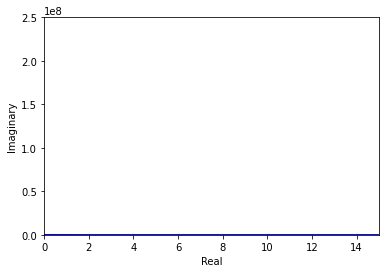

In [40]:
#train the model with optimized parameters for different vector sizes  

#dictionary of results
result_dic = {}


#vector sizes to try
vec_sizes = [3, 4]


#train the model
for curr_vec in vec_sizes:

    curr_model = w2v.Word2Vec (
    sg = 1, #skip-gram 
    workers = multiprocessing.cpu_count(), #use all cores 
    vector_size = curr_vec, #dimension of the embedding space   
    window = 9, #words befores and after the center word
    sample = 0, #whithout subsampling 
    min_count = 1, #use every word
    negative = 5, #noise-words
    hs = 0, #negative sampling
    ns_exponent = 0, #exponent to shape negative sampling 
    alpha = 0.025, #initial learning rate
    min_alpha = 0.0001, #final learning rate 
    )

    #vocabulary creation
    model.build_vocab(sentences_series) 

    #model training
    model.train(sentences_series, epochs = 5, total_examples = model.corpus_count, compute_loss = True, callbacks = [callback()])
    
    #save results in the dictionary 
    result_dic[curr_vec_size] = plot_eigenvalues(curr_model, curr_vec)

In [ ]:
#alternative 1 - export result_dic and plot in excel

#convert the dictionary to dataframe
result_dic = pd.DataFrame(data = result_dic, index = [0])

result_dic = (result_dic.T)

result_dic.to_excel('3transfers_word2vec_matrix_originalcols_eingenvalues.xlsx')

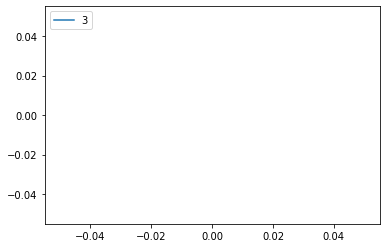

In [41]:
#alternative 2 - plot result_dic with matplotlib

plt.plot(list(result_dic.keys()), list(result_dic.values()))

plt.legend(['3', '4'], loc = 'upper left')
plt.savefig('3transfers_word2vec_matrix_originalcols_eingenvalues.png')

In [136]:
#---------------------------------------------operations with word vectors----------------------------------------------------#

#topn most similar words 
model.wv.most_similar('fraud')[:10]

#another alternative - same output
#model.wv.similar_by_word('fraud', topn = 10)

[('c1227163', 0.9598638415336609),
 ('erbecdda', 0.9589893221855164),
 ('c2274936', 0.9488281607627869),
 ('c803228', 0.9453110098838806),
 ('c739295', 0.945004403591156),
 ('bicndkap', 0.9430294036865234),
 ('c1192508', 0.9413386583328247),
 ('apbicndk', 0.940809428691864),
 ('c2413987', 0.9406024217605591),
 ('c1186386', 0.9397475719451904)]

In [60]:
#word from the word's list most similar to the 1st word given
model.wv.most_similar_to_given('c29814', ['windows', 'c29814'])

'c29814'

In [139]:
#cosine similarity between two words
model.wv.similarity('nfraud', 'windows')

0.72542083

In [ ]:
#cosine similarity between two sets of words
model.wv.n_similarity(['pc', 'windows'], ['tablet', 'android'])

In [42]:
#cosine similarities between one vector and a set of other vectors
c = np.array([0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088184])
d = np.array([[ 0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088185], 
             [ 0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088186],
             [ 0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -1.5088186]])

model.wv.cosine_similarities(c, d)

array([1.        , 1.        , 0.87118566])

In [ ]:
#cosine distances from given word or vector to all words in other_words
#if other_words is empty it returns the distance between word_or_vectors and all words in vocab
model.wv.distances('pc', other_words = ('tablet', 'mobile'))

In [140]:
#cosine distance between two words
model.wv.distance('nfraud', 'windows')

0.27457916736602783

In [ ]:
#positive contribute positively towards the similarity and negative keys negatively
#cosine similarity
model.wv.most_similar(positive = ['pc', 'windows'], negative = ['android'])

In [ ]:
#topn most similar words using the multiplicative combination objective
#additional positive or negative examples contribute to the numerator or denominator respectively
#a single positive example is the same as most_similar()
model.wv.most_similar_cosmul(positive = ['pc', 'windows'], negative = ['android'])

In [64]:
#relative cosine similarity between two words given topn similar words
#1st word - word for which we have to look topn similar word
#2nd word - word for which we are evaluating relative cosine similarity with the 1st word
model.wv.relative_cosine_similarity('windows', 'c29814')

0.08599045556789632

In [23]:
#word from the given list that doesn’t go with the others
model.wv.doesnt_match(['nbe', 'trfint', 'e3', 'r3', 'ntrusted', 'io4', 'id875448', 'ueabbl', 'pinka', 'ip17218224251', 
                       'nmobile', 'ntablet', 'pc', 'ntouch', 'nbot', 'chrome', 'windows', 'ncd1', 'nid2796', 'niod1', 'nidd0', 
                       'ctd690877', 'idtd-1', 'cdarbe', 'eyagbr', 'ncid1', 'nciod1', 'ncidd1', 'd20190814', 'h0', 'cfi1'])

'cdarbe'

In [67]:
#topn most similar keys
#when topn is None the similarities for all words are returned as a one-dimensional numpy array with the size of the vocabulary
model.wv.similar_by_key('windows', topn = None)

array([0.79617625, 0.7849064 , 0.7787468 , ..., 0.83587   , 0.7493661 ,
       0.8069302 ], dtype=float32)

In [70]:
#topn most similar keys by vector
a = np.array([0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088185])
model.wv.similar_by_vector(a, topn = None)

array([0.8930437 , 0.8680161 , 0.8603089 , ..., 0.996568  , 0.97099257,
       0.92748225], dtype=float32)

In [61]:
#rank of the distance of word2 from word1 in relation to distances of all words from the word1
model.wv.rank('c29814','windows')

460470

In [36]:
#rank the given words by similarity to the centroid of all the words
model.wv.rank_by_centrality(['windows', 'c29814'])

[(1.0, 'windows')]

In [42]:
model.predict_output_word(['nbe',
 'trfsep',
 'c1315677',
 'e3',
 'r3',
 'ntrusted',
 'io1315678',
 'id6450988',
 'bicnkap',
 'rbecdda',
 'ip8215554253',
 'chrome',
 'windows',
 'afternoon',
 'w13',
 'fri',
 'mar',
 'pc'])

[('fraud', 0.00017370317),
 ('ip1888213311', 0.00014432374),
 ('ip624823178', 0.00013978702),
 ('ip8915324795', 0.0001397407),
 ('ip9460106235', 0.00013352059),
 ('ip2131337220', 0.00013190809),
 ('ip89153209138', 0.00013176212),
 ('ip10950231100', 0.00013141165),
 ('ip1883767135', 0.00013045238),
 ('ip9215426222', 0.00012850929)]